1. Perform full EDA on Salary data and determine the candidate features for a multiple linear regression model.(hint: you may want to use log transformation on the salary column and use it instead of Salary provided in the data). Use the log salary as the output and the rest of the variables as inputs. (you can ignore the categorical data columns).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import set_option
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions
from numpy import log
import seaborn as sns
from pandas.plotting import scatter_matrix

In [4]:
filename = 'Baseball_salary.csv'
data = read_csv(filename)
set_printoptions(precision=3)
data = data.drop(['Unnamed: 0','League', 'Division', 'NewLeague'], axis=1)
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [5]:
print(data.isnull().sum())

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64


In [6]:
# Clean the data by dropping rows with null salary
data = data.dropna(subset=['Salary'])
print(data.isnull().sum())

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64


In [7]:
data['Log_Salary'] = log(data['Salary'])
array = data.values
Y1 = data['Log_Salary']
X1 = data.drop(['Salary', 'Log_Salary'], axis=1)
X1names = X1.columns
data.head(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Log_Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,6.163315
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,6.214608
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,6.620073


In [8]:
data_norm = X1.copy()

# Normalize
norm_scaler = Normalizer().fit(data_norm)
data_norm = norm_scaler.transform(data_norm)
# add output to normalized data
data_norm = pd.DataFrame(data_norm, columns=X1names)
data_norm['Log_Salary'] = Y1

data_stand = X1.copy()

# Standardize
stand_scaler = StandardScaler().fit(data_stand)
data_stand = stand_scaler.transform(data_stand)
# add output to standardized data
data_stand = pd.DataFrame(data_stand, columns=X1names)
data_stand['Log_Salary'] = Y1
data_objects = ((data_norm, 'data_norm'), (data_stand, 'data_stand'), (data, "data_raw"))

In [9]:
# Descriptive stats
set_option('display.width', 100)
set_option('display.precision', 1)
for data, name in data_objects:
    print(f"Data: {name}")
    print(data.describe())

Data: data_norm
         AtBat     Hits    HmRun     Runs      RBI    Walks    Years   CAtBat    CHits   CHmRun  \
count  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02  2.6e+02   
mean   2.4e-01  6.2e-02  6.3e-03  3.1e-02  2.9e-02  2.3e-02  3.0e-03  8.5e-01  2.2e-01  2.1e-02   
std    1.7e-01  4.4e-02  6.9e-03  2.4e-02  2.2e-02  2.0e-02  1.7e-03  1.4e-01  4.5e-02  1.3e-02   
min    1.4e-02  3.5e-03  0.0e+00  0.0e+00  0.0e+00  0.0e+00  6.6e-04  2.7e-02  5.7e-03  0.0e+00   
25%    9.8e-02  2.6e-02  1.9e-03  1.3e-02  1.2e-02  9.3e-03  2.0e-03  8.4e-01  2.0e-01  1.0e-02   
50%    1.9e-01  5.0e-02  3.9e-03  2.5e-02  2.2e-02  1.7e-02  2.5e-03  9.1e-01  2.4e-01  1.9e-02   
75%    3.3e-01  8.8e-02  8.4e-03  4.3e-02  3.9e-02  3.0e-02  3.6e-03  9.3e-01  2.5e-01  3.1e-02   
max    6.5e-01  2.0e-01  3.7e-02  1.2e-01  1.1e-01  1.0e-01  1.3e-02  9.5e-01  3.1e-01  6.1e-02   

         CRuns     CRBI   CWalks  PutOuts  Assists   Errors  Log_Salary  
count  2.6e+02  2.

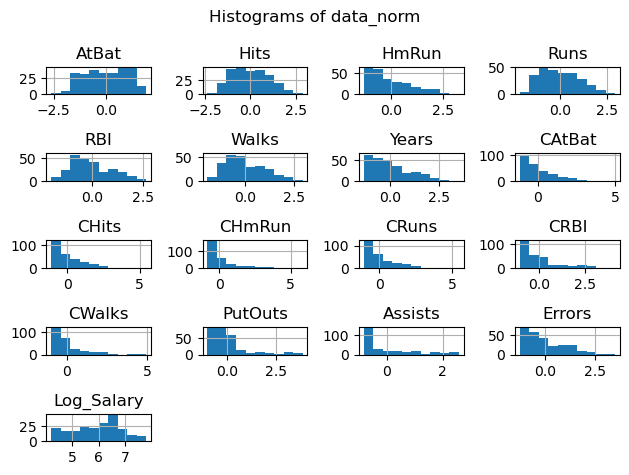

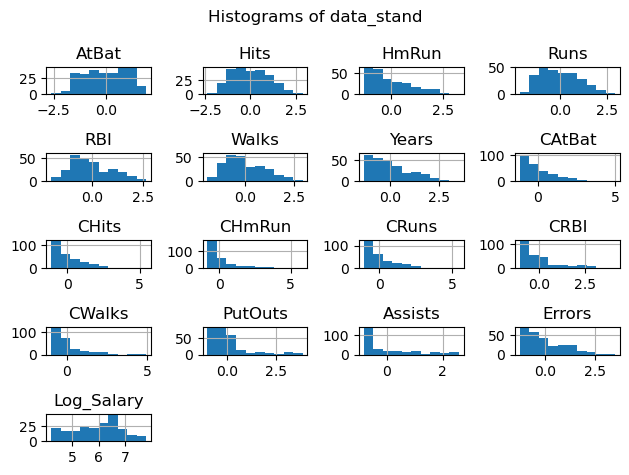

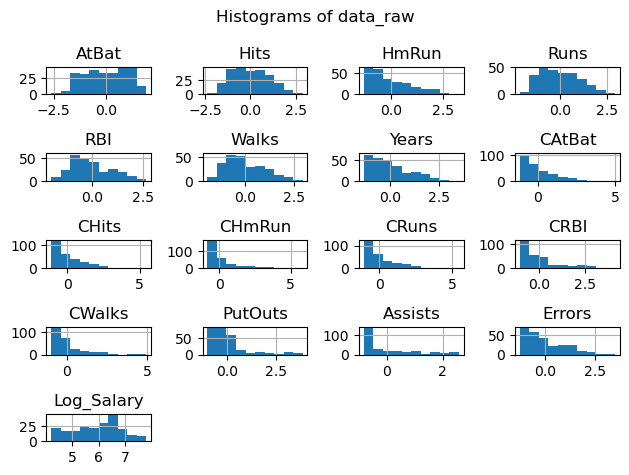

In [10]:
# Histograms
for data, name in data_objects:
    data_stand.hist()
    plt.suptitle(f"Histograms of {name}")
    plt.tight_layout()
    plt.show()

              AtBat     Hits    HmRun     Runs      RBI    Walks    Years   CAtBat    CHits  \
AtBat       1.0e+00  9.8e-01  6.1e-01  9.3e-01  8.6e-01  8.0e-01  1.6e-01 -6.7e-01 -6.7e-01   
Hits        9.8e-01  1.0e+00  6.4e-01  9.4e-01  8.8e-01  7.9e-01  1.2e-01 -6.3e-01 -6.0e-01   
HmRun       6.1e-01  6.4e-01  1.0e+00  7.0e-01  8.6e-01  5.3e-01  2.8e-02 -3.8e-01 -3.6e-01   
Runs        9.3e-01  9.4e-01  7.0e-01  1.0e+00  8.6e-01  8.4e-01  6.9e-02 -5.7e-01 -5.4e-01   
RBI         8.6e-01  8.8e-01  8.6e-01  8.6e-01  1.0e+00  7.4e-01  1.1e-01 -5.6e-01 -5.3e-01   
Walks       8.0e-01  7.9e-01  5.3e-01  8.4e-01  7.4e-01  1.0e+00  1.1e-01 -5.5e-01 -5.6e-01   
Years       1.6e-01  1.2e-01  2.8e-02  6.9e-02  1.1e-01  1.1e-01  1.0e+00 -1.1e-01 -2.8e-01   
CAtBat     -6.7e-01 -6.3e-01 -3.8e-01 -5.7e-01 -5.6e-01 -5.5e-01 -1.1e-01  1.0e+00  9.1e-01   
CHits      -6.7e-01 -6.0e-01 -3.6e-01 -5.4e-01 -5.3e-01 -5.6e-01 -2.8e-01  9.1e-01  1.0e+00   
CHmRun     -1.9e-01 -1.7e-01  4.4e-01 -6.4e-02  1.

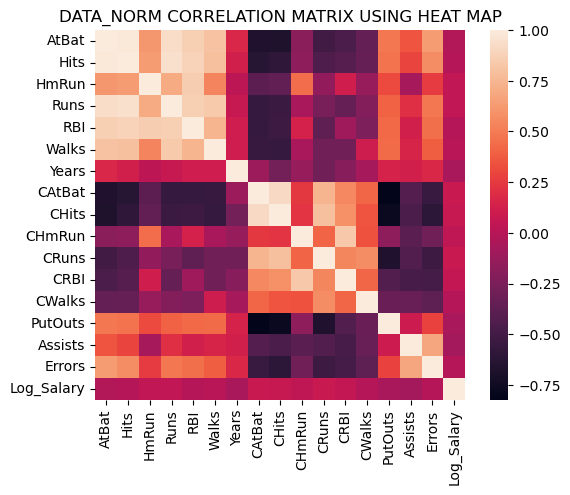

<Figure size 640x480 with 0 Axes>

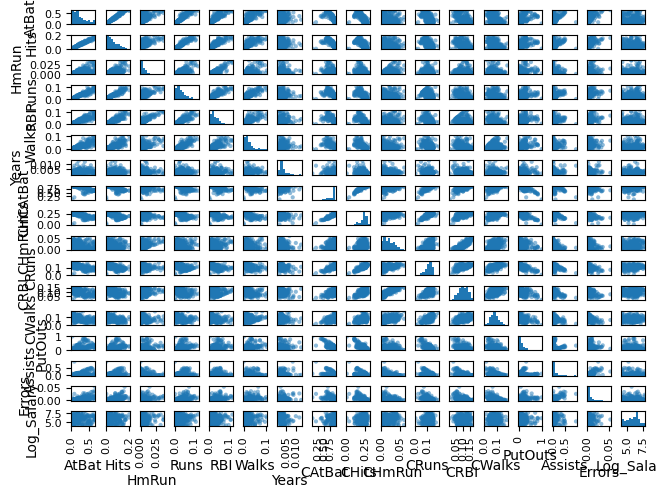

              AtBat     Hits    HmRun     Runs      RBI    Walks    Years   CAtBat    CHits  \
AtBat       1.0e+00  9.8e-01  6.1e-01  9.3e-01  8.6e-01  8.0e-01  1.6e-01 -6.7e-01 -6.7e-01   
Hits        9.8e-01  1.0e+00  6.4e-01  9.4e-01  8.8e-01  7.9e-01  1.2e-01 -6.3e-01 -6.0e-01   
HmRun       6.1e-01  6.4e-01  1.0e+00  7.0e-01  8.6e-01  5.3e-01  2.8e-02 -3.8e-01 -3.6e-01   
Runs        9.3e-01  9.4e-01  7.0e-01  1.0e+00  8.6e-01  8.4e-01  6.9e-02 -5.7e-01 -5.4e-01   
RBI         8.6e-01  8.8e-01  8.6e-01  8.6e-01  1.0e+00  7.4e-01  1.1e-01 -5.6e-01 -5.3e-01   
Walks       8.0e-01  7.9e-01  5.3e-01  8.4e-01  7.4e-01  1.0e+00  1.1e-01 -5.5e-01 -5.6e-01   
Years       1.6e-01  1.2e-01  2.8e-02  6.9e-02  1.1e-01  1.1e-01  1.0e+00 -1.1e-01 -2.8e-01   
CAtBat     -6.7e-01 -6.3e-01 -3.8e-01 -5.7e-01 -5.6e-01 -5.5e-01 -1.1e-01  1.0e+00  9.1e-01   
CHits      -6.7e-01 -6.0e-01 -3.6e-01 -5.4e-01 -5.3e-01 -5.6e-01 -2.8e-01  9.1e-01  1.0e+00   
CHmRun     -1.9e-01 -1.7e-01  4.4e-01 -6.4e-02  1.

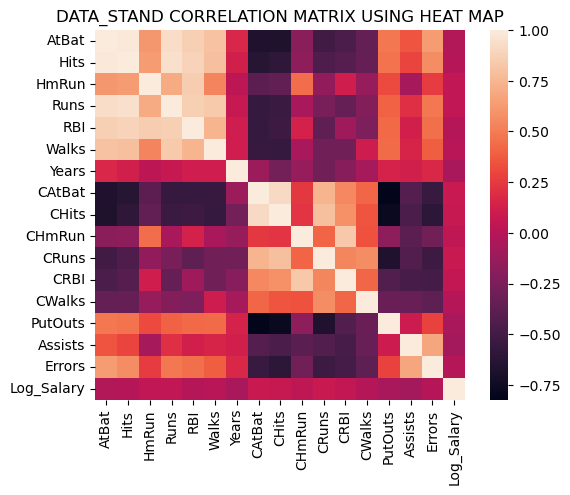

<Figure size 640x480 with 0 Axes>

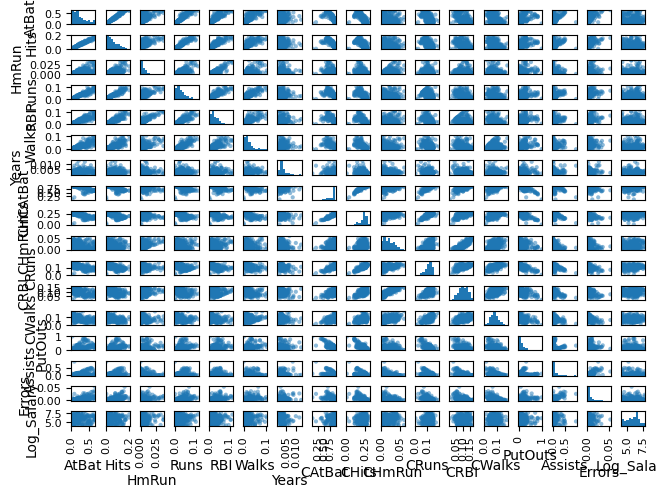

              AtBat     Hits    HmRun     Runs      RBI    Walks    Years   CAtBat    CHits  \
AtBat       1.0e+00  9.8e-01  6.1e-01  9.3e-01  8.6e-01  8.0e-01  1.6e-01 -6.7e-01 -6.7e-01   
Hits        9.8e-01  1.0e+00  6.4e-01  9.4e-01  8.8e-01  7.9e-01  1.2e-01 -6.3e-01 -6.0e-01   
HmRun       6.1e-01  6.4e-01  1.0e+00  7.0e-01  8.6e-01  5.3e-01  2.8e-02 -3.8e-01 -3.6e-01   
Runs        9.3e-01  9.4e-01  7.0e-01  1.0e+00  8.6e-01  8.4e-01  6.9e-02 -5.7e-01 -5.4e-01   
RBI         8.6e-01  8.8e-01  8.6e-01  8.6e-01  1.0e+00  7.4e-01  1.1e-01 -5.6e-01 -5.3e-01   
Walks       8.0e-01  7.9e-01  5.3e-01  8.4e-01  7.4e-01  1.0e+00  1.1e-01 -5.5e-01 -5.6e-01   
Years       1.6e-01  1.2e-01  2.8e-02  6.9e-02  1.1e-01  1.1e-01  1.0e+00 -1.1e-01 -2.8e-01   
CAtBat     -6.7e-01 -6.3e-01 -3.8e-01 -5.7e-01 -5.6e-01 -5.5e-01 -1.1e-01  1.0e+00  9.1e-01   
CHits      -6.7e-01 -6.0e-01 -3.6e-01 -5.4e-01 -5.3e-01 -5.6e-01 -2.8e-01  9.1e-01  1.0e+00   
CHmRun     -1.9e-01 -1.7e-01  4.4e-01 -6.4e-02  1.

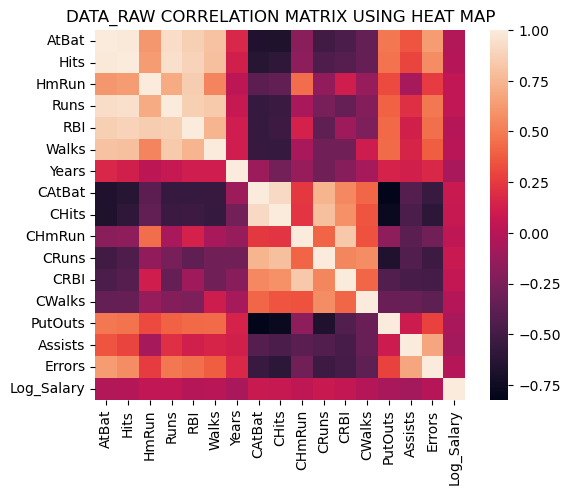

<Figure size 640x480 with 0 Axes>

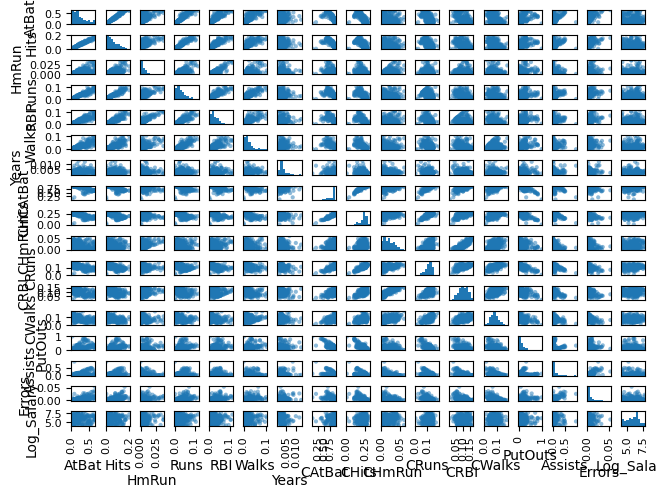

In [14]:
for data, name in data_objects:
    plt.figure() # new plot
    #plt.tight_layout()
    corMat = data_norm.corr(method='pearson')
    print(corMat)
    ## plot correlation matrix as a heat map
    sns.heatmap(corMat, square=True)
    plt.yticks(rotation=0)
    plt.xticks(rotation=90)
    plt.title(f"{name.upper()} CORRELATION MATRIX USING HEAT MAP")
    plt.show()
    
    ## scatter plot of all data
    plt.figure()
    # # The output overlaps itself, resize it to display better (w padding)
    scatter_matrix(data_norm)
    plt.tight_layout(pad=0.1)
    plt.show()